In [87]:
from library_new import *

# 1.

In [89]:
import math

# Choose a suitable initial guess and solve the equation using fixed-point iteration
initial_guess = 0
solution = fixed_point(lambda x: math.exp(-x), initial_guess,1e-4)

# Display the result
print(f"The solution to exp(-x) - x = 0 is x ≈ {solution:0.4f}")


The solution to exp(-x) - x = 0 is x ≈ 0.5671


# 2.

In [18]:
def integrand(x):
    return 1 / np.sqrt(1 + x**4)

In [21]:
a, b = 0, 1

# Number of subintervals for Simpson's rule
n = 1000  # You can adjust this for desired accuracy

# Apply Simpson's rule
simpson_result = float(simpson(integrand, a, b, n))

# Apply Gaussian quadrature
gaussian_result = gaussian_quadrature(integrand, a, b)

print('The value of integrad using simpsons Rule:' , round(simpson_result, 6))
print('The value of integrad using Gaussian quadrature Rule:' , round(gaussian_result, 6))


The value of integrad using simpsons Rule: 0.927037
The value of integrad using Gaussian quadrature Rule: 0.927184


# 3.

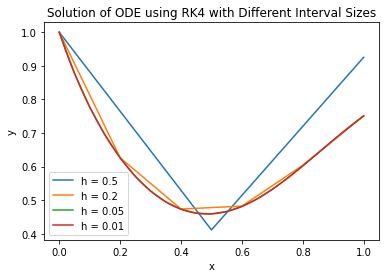

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the ODE
def f(x, y):
    return 5 * x**2 - y * np.exp(x + y)

# Initial conditions
x0 = 0
y0 = 1.0
xk = 1.0

# Interval sizes
interval_sizes = [0.5, 0.2, 0.05, 0.01]

# Plot the solutions
for h in interval_sizes:
    x, y = range_kutta4(f, x0, y0, xk, h)
    
    output_filename = f'Question3_datapoints.txt'
    with open(output_filename, 'w') as file:
        file.write("x \t\t y\n")
        for i in range(len(x)):
            file.write(f"{x[i]:.4f} \t {y[i]:.6f}\n")

    # Plot the solutions
    plt.plot(x, y, label=f'h = {h}')

# Show the table and plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of ODE using RK4 with Different Interval Sizes')
plt.legend()
plt.show()

# 4.

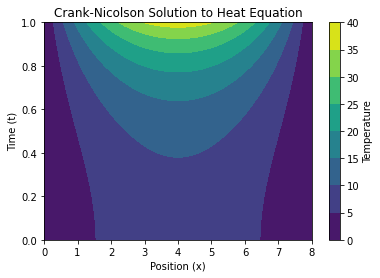

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial condition function
def initial_condition(x):
    return 4 * x - (x**2) / 2

# Define boundary conditions functions
def boundary_x_start(t):
    return 0

def boundary_x_end(t):
    return 0

# Parameters
L = 8.0  # Length of the rod
T = 1.0  # Total time
Nx = 50   # Number of spatial points (limiting for display)
Nt = 50  # Number of time points (limiting for display)
alpha = 0.01  # Stability parameter (adjust as needed)

# Solve using Crank-Nicolson method with defined functions
x_values, t_values, u = crank_nicolson_solver(
    L, T, Nx, Nt, alpha,
    initial_condition,
    {'x_start': boundary_x_start, 'x_end': boundary_x_end}
)

# Display the limited tabulated solution
output_filename = 'quenstion4_datapoints.txt'
with open(output_filename, 'w') as file:
    file.write("x \t\t t \t\t u\n")
    for i in range(Nx):
        for j in range(Nt):
            file.write(f"{x_values[i]:.4f} \t {t_values[j]:.4f} \t {u[i, j]:.6f}\n")

# Display the solution in a contour plot
X, T = np.meshgrid(x_values, t_values)
plt.contourf(X, T, u.T, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Crank-Nicolson Solution to Heat Equation')
plt.show()


# 5.

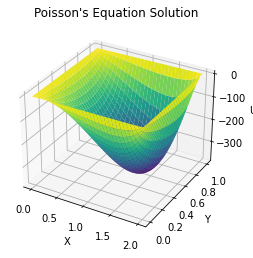

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def poisson_solver(nx, ny):
    # Define the grid
    x = np.linspace(0, 2, nx)
    y = np.linspace(0, 1, ny)

    u = np.zeros((nx, ny))
    u[:, 0] = x
    u[:, -1] = x * np.exp(1)
    u[0, :] = 0
    u[-1, :] = 2 * np.exp(y)

    # Solve the Poisson's equation using finite differences
    for _ in range(1000): 
        u_new = u.copy()

        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u_new[i, j] = (u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - x[i] * np.exp(y[j])) / 4

        u = u_new

    return x, y, u

# Grid size
nx = 62
ny = 62

# Solve Poisson's equation
x, y, solution = poisson_solver(nx, ny)

output_filename = 'poisson_solutiondata.txt'
with open(output_filename, 'w') as file:
    file.write("x \t\t y \t\t u\n")
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            file.write(f"{xi:.4f} \t {yj:.4f} \t {solution[i, j]:.6f}\n")

# Display the solution in a 3-D plot
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, solution.T, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title('Poisson\'s Equation Solution')
plt.show()
